In [1]:
# !pip install gdown
import gdown

In [2]:
!gdown --id 1E_1DwFDhwSG9H0pakC0UQUXcY5-vFyiM

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1E_1DwFDhwSG9H0pakC0UQUXcY5-vFyiM
To: /content/oral C1.zip
100% 22.8M/22.8M [00:00<00:00, 43.8MB/s]


In [3]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: oral C1/auto/
   creating: oral C1/auto/0/
  inflating: oral C1/auto/0/(11).jpg  
  inflating: oral C1/auto/0/(12).jpg  
  inflating: oral C1/auto/0/(14).jpg  
  inflating: oral C1/auto/0/(19).jpg  
  inflating: oral C1/auto/0/(24).jpg  
  inflating: oral C1/auto/0/(27).jpg  
  inflating: oral C1/auto/0/(30).jpg  
  inflating: oral C1/auto/0/(34).jpg  
  inflating: oral C1/auto/0/(38).jpg  
  inflating: oral C1/auto/0/(39).jpg  
  inflating: oral C1/auto/0/(4).jpg  
  inflating: oral C1/auto/0/(5).jpg  
  inflating: oral C1/auto/0/(7).jpg  
  inflating: oral C1/auto/0/(9).jpg  
   creating: oral C1/auto/1/
  inflating: oral C1/auto/1/(10).jpg  
  inflating: oral C1/auto/1/(11).jpg  
  inflating: oral C1/auto/1/(14).jpg  
  inflating: oral C1/auto/1/(16).jpg  
  inflating: oral C1/auto/1/(17).jpg  
  inflating: oral C1/auto/1/(19).jpg  
  inflating: oral C1/auto/1/(2).jpg  
  inflating: oral C1/auto/1/(21).jpg  
  inflating: oral C1/auto/1/(23

In [4]:
import pathlib
data_dir = '/content/dataset'
data_dir = pathlib.Path(data_dir).with_suffix('')

In [5]:
import pathlib
data_dir = '/content/dataset'
data_dir = pathlib.Path(data_dir).with_suffix('')

In [ ]:
# !kaggle datasets download -d shashwatwork/knee-osteoarthritis-dataset-with-severity -p Dataset
# !unzip "Dataset/*.zip" -d Dataset
# !rm Dataset/*.zip

In [6]:
!pip install -q fastbook
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 20.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #x - image; y - single class
    get_items=get_image_files, #get image
    splitter=GrandparentSplitter(valid_name='val'), #use parent folder as train-valid split
    get_y=parent_label, #use parent folder as label
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224,pad_mode='zeros',do_flip=False,flip_vert=False,max_rotate=0,max_zoom=0)
    )

# Create your dataloaders
dls = dblock.dataloaders("/content/dataset",bs=32)

TypeError: 'NoneType' object is not iterable

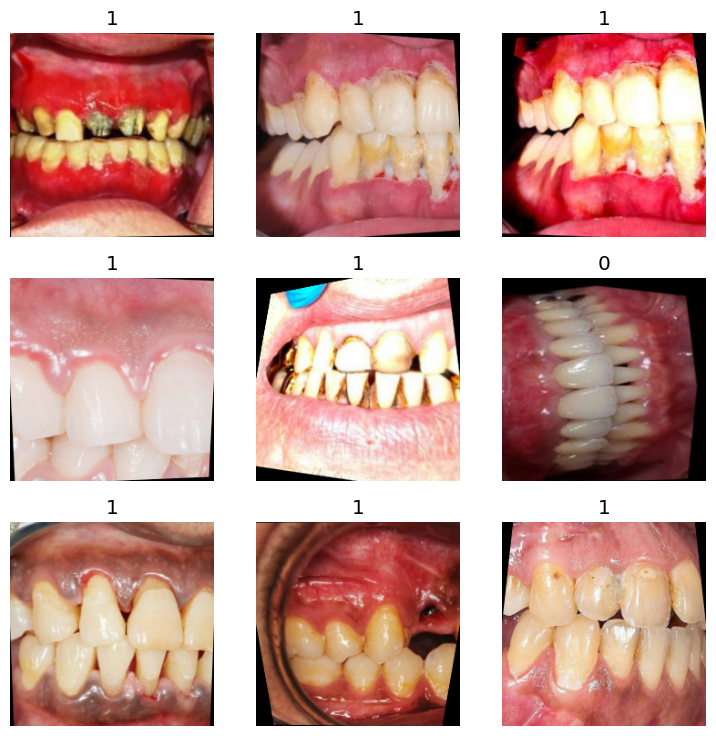

In [ ]:
dls.train.show_batch(max_n=9,nrows=3)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy )
learn.fine_tune(epochs=20, freeze_epochs=1, base_lr=2e-3,)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 75.4MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.862472,0.668686,0.772727,00:10


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


epoch,train_loss,valid_loss,accuracy,time
0,0.351428,0.463501,0.868687,00:07
1,0.302829,0.358106,0.893939,00:09
2,0.222541,0.365382,0.909091,00:07
3,0.209506,0.273025,0.924242,00:09
4,0.142152,0.274956,0.904040,00:07
5,0.104313,0.296815,0.909091,00:09
6,0.088630,0.443894,0.914141,00:08
7,0.075849,0.699025,0.858586,00:08
8,0.072730,0.360389,0.934343,00:09
9,0.056189,0.355503,0.939394,00:08


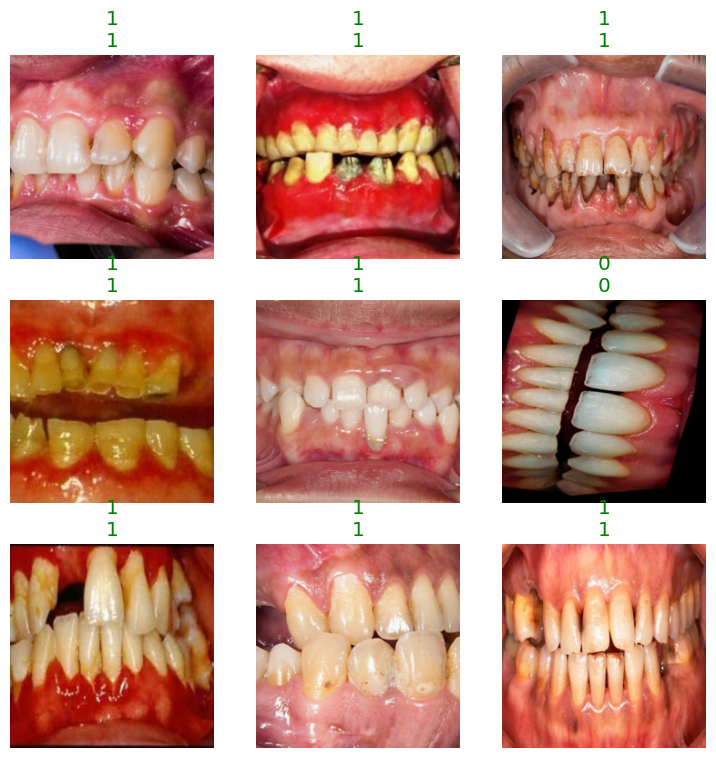

In [ ]:
learn.show_results() #true label - บน; prediction - ล่าง

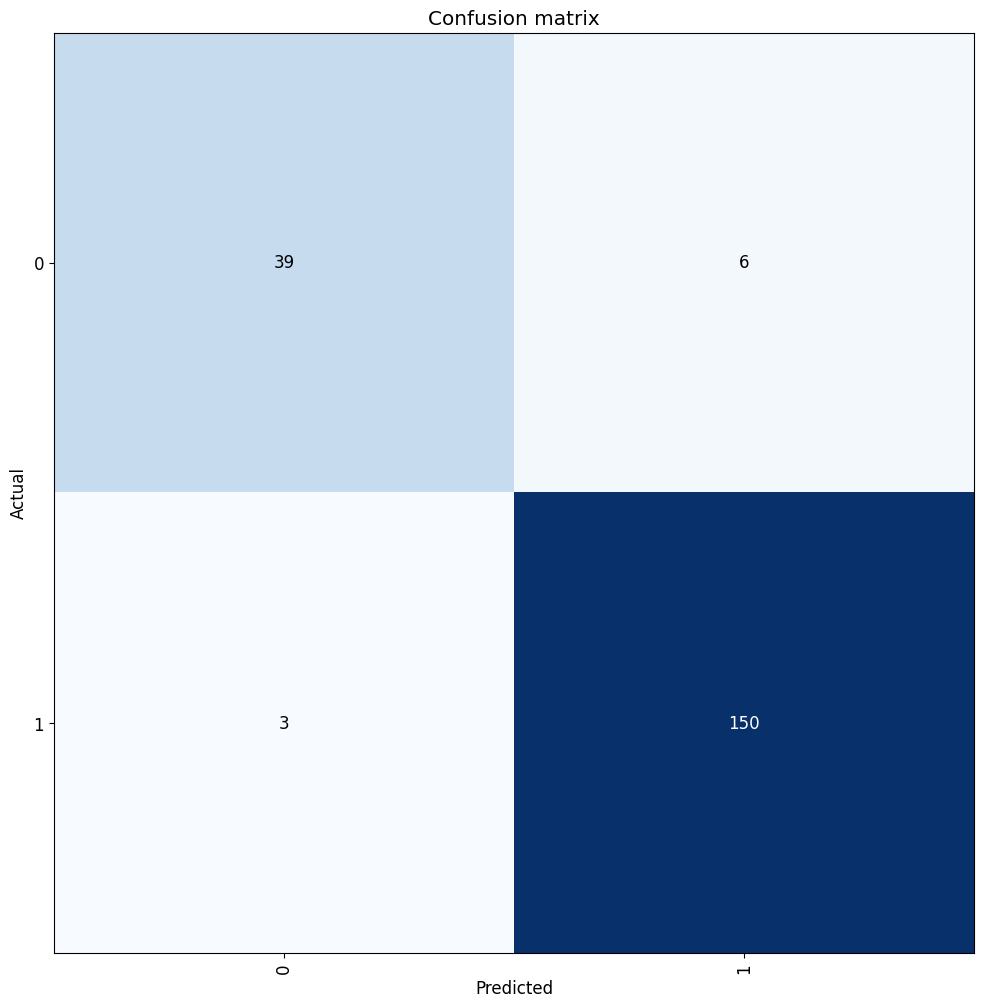

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.96      0.98      0.97       153

    accuracy                           0.95       198
   macro avg       0.95      0.92      0.93       198
weighted avg       0.95      0.95      0.95       198

